<a href="https://colab.research.google.com/github/Brycexxx/fastai/blob/master/lesson3_head_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression with BIWI head pose dataset

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

### Getting and converting the data

In [0]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [5]:
path.ls()[:5]

[PosixPath('/root/.fastai/data/biwi_head_pose/04'),
 PosixPath('/root/.fastai/data/biwi_head_pose/06'),
 PosixPath('/root/.fastai/data/biwi_head_pose/17'),
 PosixPath('/root/.fastai/data/biwi_head_pose/09'),
 PosixPath('/root/.fastai/data/biwi_head_pose/14.obj')]

In [6]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6); cal

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [0]:

fname = '09/frame_00667_rgb.jpg'

In [0]:
def img2txt_name(f): return path/f'{str(f)[:-7]}pose.txt'

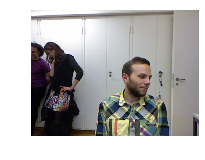

In [9]:

img = open_image(path/fname)
img.show()

In [11]:

ctr = np.genfromtxt(img2txt_name(fname), skip_header=3); ctr

array([187.332 ,  40.3892, 893.135 ])

In [0]:

def convert_biwi(coords):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c2,c1])

def get_ctr(f):
    ctr = np.genfromtxt(img2txt_name(f), skip_header=3)
    return convert_biwi(ctr)

def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

In [13]:
get_ctr(fname)

tensor([263.9104, 428.5814])

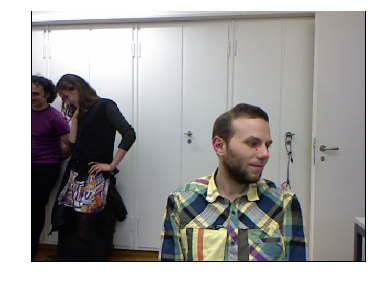

In [16]:
ctr = get_ctr(fname)
img.show(y=get_ip(img, ctr), figsize=(6, 6))

### Creating a dataset

In [0]:
data = (PointsItemList.from_folder(path)
                      .split_by_valid_func(lambda o: o.parent.name=='13')
                      .label_from_func(get_ctr)
                      .transform(get_transforms(), tfm_y=True, size=(120, 160))
                      .databunch().normalize(imagenet_stats))

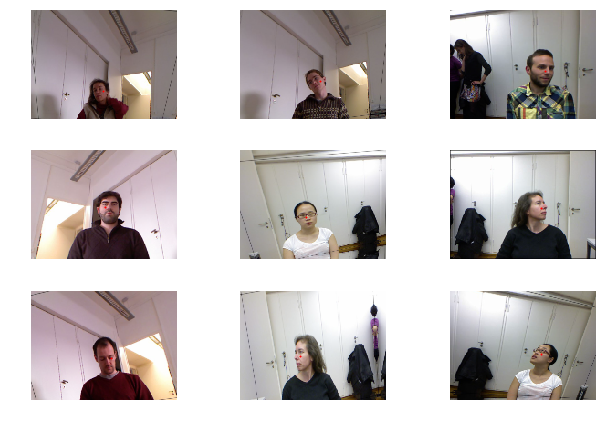

In [19]:
data.show_batch(3, figsize=(9, 6))

### Train model

In [0]:
learn = create_cnn(data, models.resnet34)
# learn.loss_func = MSELossFlat()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


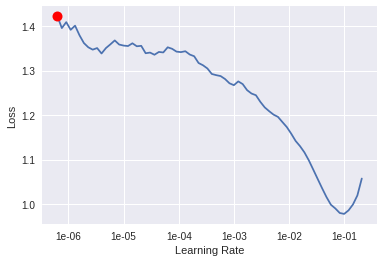

In [43]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 2e-2

In [45]:
learn.fit_one_cycle(12, max_lr=slice(lr))

epoch,train_loss,valid_loss
1,1.375445,0.141445
2,1.401832,0.141162
3,1.369562,0.121794
4,1.338107,0.115059
5,1.373661,0.132240
6,1.371055,0.103265
7,1.372767,0.126583
8,1.374218,0.112630
9,1.380953,0.134636
10,1.374386,0.105021


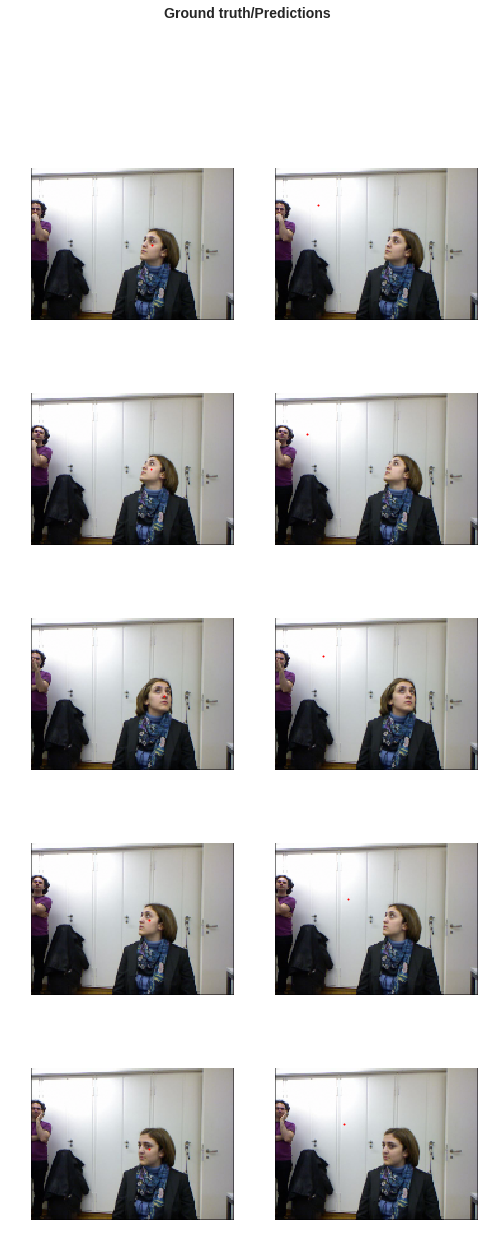

In [46]:
learn.show_results(3)

Ooops, what's wrong